### BANK CUSTOMER CHURN PREDICTION

#### Task - 

- The task is to train a machine learning model to predict whether a bank customer will churn (leave the bank) or not based on various customer attributes and banking behavior.

#### Goal -

- The goal is to create a model that can accurately identify customers who are likely to churn, enabling proactive retention strategies.

### Importing Libraries & Dataset

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [195]:
warnings.filterwarnings('ignore')

In [15]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
print(dataset)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [17]:
## Print first 5 rows using head()
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
## Print last 5 rows using tail()
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [19]:
## dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
## numeric variables descriptive statistics 
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [21]:
print(dataset.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

- CreditScore between 350(min) & 850(max)   
- Average Age of the Customers is 38.92 ==> means 39
- Tenure is maximum 10 (years) which is assume bank tenure
- First quantiles of balance are equal to which means the ==> distribution may not be normal distribution

In [22]:
## Shape of dataset
dataset.shape

(10000, 14)

In [23]:
## Which Contries existing in our dataset?
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [24]:
## Which Genders existing in our dataset?
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [25]:
## Check Duplicate values present or not in dataset
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [27]:
## Drop the columns which are not necessary 
dataset.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [29]:
print(dataset)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

### Visualizing Categorical variables -

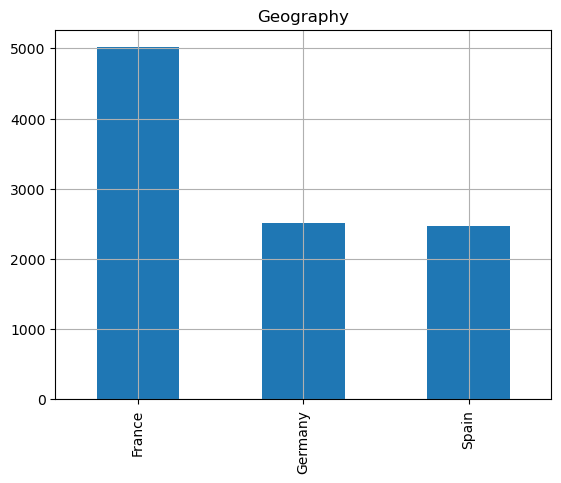

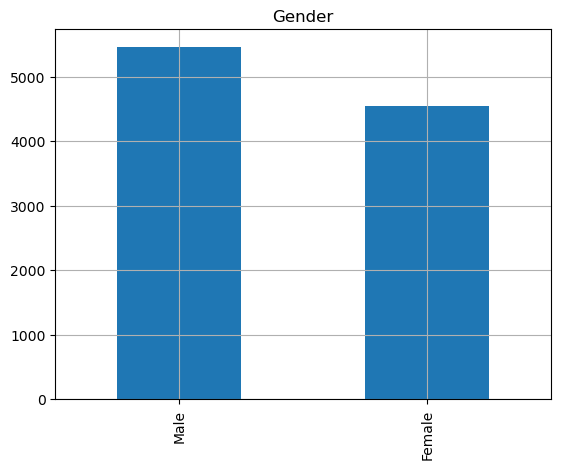

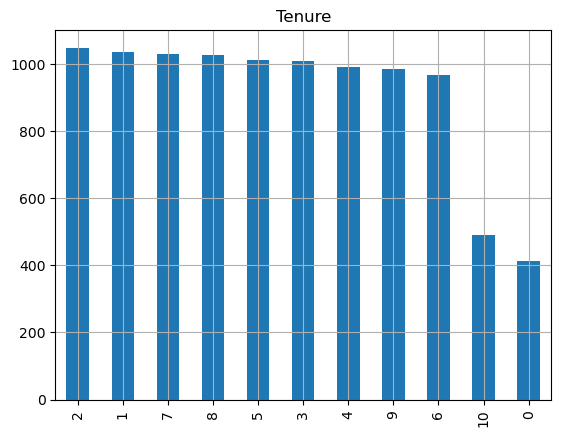

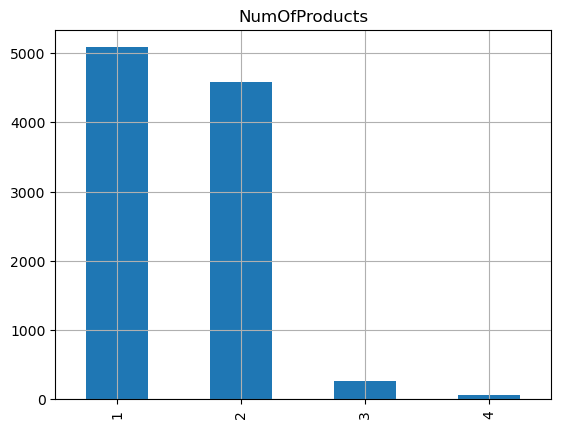

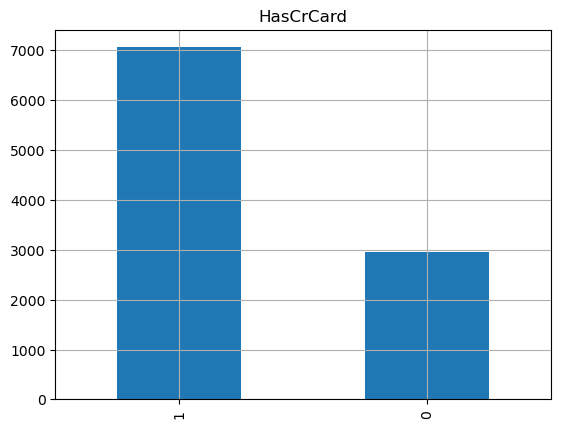

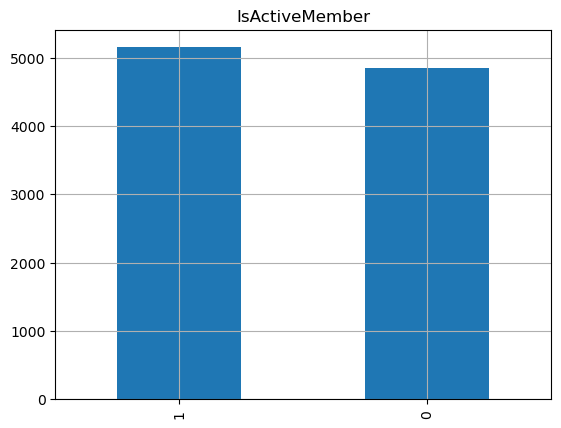

In [46]:
features_cat=['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']

for f in features_cat:
    dataset[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

### Conclusion from Visualization -

- Majority of the customers are from "france" but most customers which churned are from "germany" maybe because of lack of resources as there are not many customers. 
- The proportion of "Male" customers churning is also greater than that of "Female" customers.
- Majority of customers have tenure between 1 to 9 & Churning rate is also high between these tenures.
- Most of the customers have "1 or 2 products" & most customers which churned are having "1 product" maybe they are not satisfied so thet are churing.
- Interesting things is majority of "customers that churned are those with credit cards" but this can be a coincidence as mojority of customers have credit cards.
- Unsurprisingly the inactive members have a greater churn & the overall proportion of inactive members is also very high. 

### Visualizing Continuous variables -

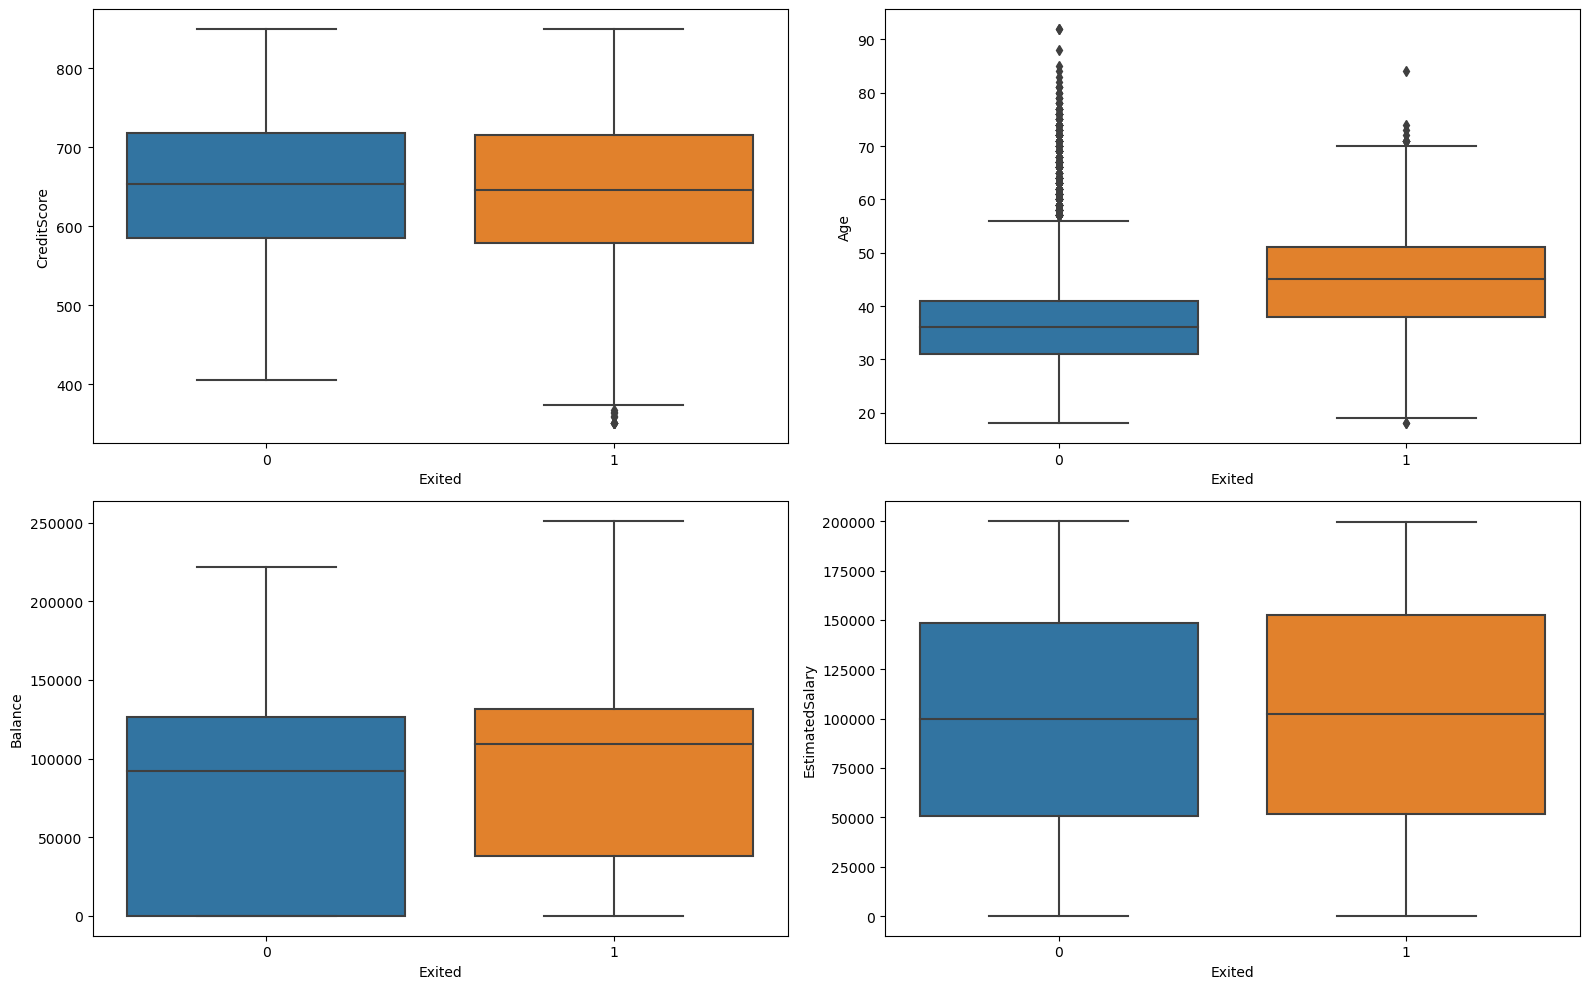

In [54]:
fig, ax = plt.subplots(2, 2, figsize = (16,10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = dataset, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = dataset, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = dataset, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = dataset, ax = ax[1][1])

plt.tight_layout()
plt.show()

### Conclusion from Visualizing Continuous variables -

- There is no significant difference in credit score distribution between clusters which are chured or not.
- Old aged customers are churning more than younger.
- Bank is loosing customers with significant bank balance.
- Estimated Salary does not have a significant on the possiblity to churn.

In [196]:
dataset.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [197]:
print(dataset.corr())

                 CreditScore  Geography    Gender       Age    Tenure  \
CreditScore         1.000000   0.007888 -0.002857 -0.003965  0.000842   
Geography           0.007888   1.000000  0.004719  0.022812  0.003739   
Gender             -0.002857   0.004719  1.000000 -0.027544  0.014733   
Age                -0.003965   0.022812 -0.027544  1.000000 -0.009997   
Tenure              0.000842   0.003739  0.014733 -0.009997  1.000000   
Balance             0.006268   0.069408  0.012087  0.028308 -0.012254   
NumOfProducts       0.012238   0.003972 -0.021859 -0.030680  0.013444   
HasCrCard          -0.005458  -0.008523  0.005766 -0.011721  0.022583   
IsActiveMember      0.025651   0.006724  0.022544  0.085472 -0.028362   
EstimatedSalary    -0.001384  -0.001369 -0.008112 -0.007201  0.007784   
Exited             -0.027094   0.035943 -0.106512  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CreditScore      0.006268       0.012238  -0.005458 

<Axes: >

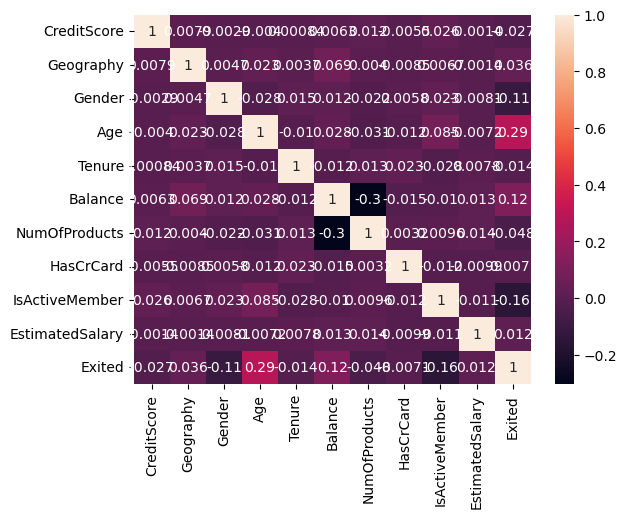

In [193]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

Correlation id very weak ->

- weak +ve correlation with age
- very weak +ve correlation with balance
- very weak -ve correlation with number of products and active members

In [59]:
## Check variable data types of all columns 
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [60]:
dataset.duplicated().sum()

0

In [63]:
## Convert categorical variables into numerical format

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['Geography','Gender']

for i in lst:
    dataset[i]=le.fit_transform(dataset[i])

dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


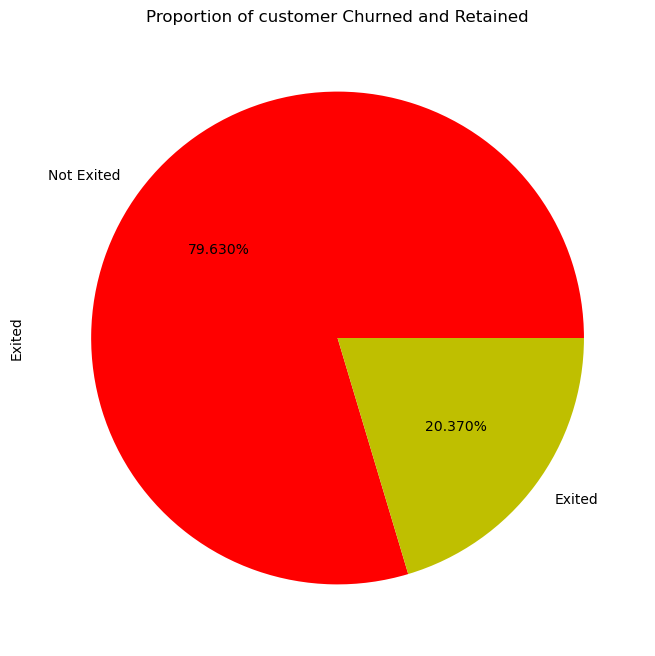

In [89]:
plt.figure(figsize=(8,8))
labels = ['Not Exited', 'Exited']
dataset["Exited"].value_counts().plot(kind='pie',labels=labels,autopct='%1.3f%%',colors=['r','y'])
labels=['Not Exited', 'Exited']
plt.title("Proportion of customer Churned and Retained")
plt.show()

### Split the data frame into x and y

In [69]:
# Seperating input and output variables

x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [70]:
# Predictor
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [71]:
# target
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [73]:
x.shape

(10000, 10)

In [74]:
y.shape

(10000,)

### Train Test Split

- The train-test split is a technique for evaluating the performance of a Machine Learning Algorithm.
- Train dataset used to fit the Machine Learning Model

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#splitting data in 80% train, 20% test with random_state=0
#we get the same train & test sets across different executions

In [78]:
#train base size
x_train.shape

(8000, 10)

In [79]:
x_test.shape,y_test.shape

((2000, 10), (2000,))

### Scaling

- it helps to balance the impact of all variables on the euclidean distance calculation and can help to imporove the performance of the algorithm
- if not scaled, the feature with a higher value range starts dominating when calculating distances

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [82]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [83]:
x_train.shape,x_test.shape

((8000, 10), (2000, 10))

### Classification Algorithms -

### 1] Logistic Regression
Logistic Regression is one of the most popular machine learning algorithms & its used for predict the "categorical dependent variable" using a given set of independent variable.

In [91]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred1=clf.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred1)
print(result)

[[1542   53]
 [ 333   72]]


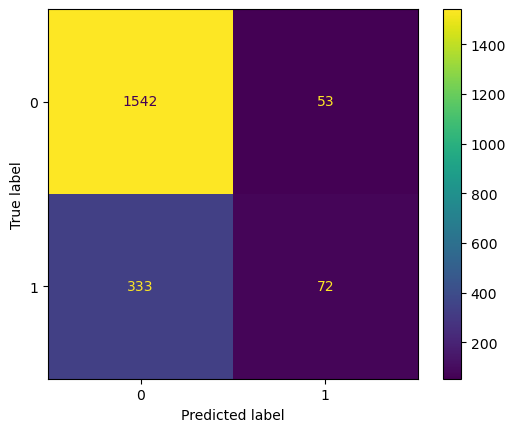

In [128]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

We Observe that from Logistic Regression ConfusionMatrix -
- 1542 customers are correctly classifed under "not churned" category & 53 are misclassified.
- 772 customers are correctly classifed under "churned" category & 333 are misclassified.

In [171]:
# Accuracy Score

from sklearn.metrics import accuracy_score
LR_pred1 = (accuracy_score(y_test,y_pred1)*100)
print(LR_pred1)

80.7


In [97]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.58      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



In [98]:
training_score = clf.score(x_train,y_train)
training_score

0.8085

In [101]:
testing_score = clf.score(x_train,y_train)
testing_score

0.8085

### 2] KNearest Neighbors
- It is used for classification and regression.
- In both cases, the input consist of the k closest training e.g. is in our dataset.
- The output depends on whether k-nn is used for classification or regression.

In [104]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred2=classifier.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred2)
print(result)

[[1496   99]
 [ 232  173]]


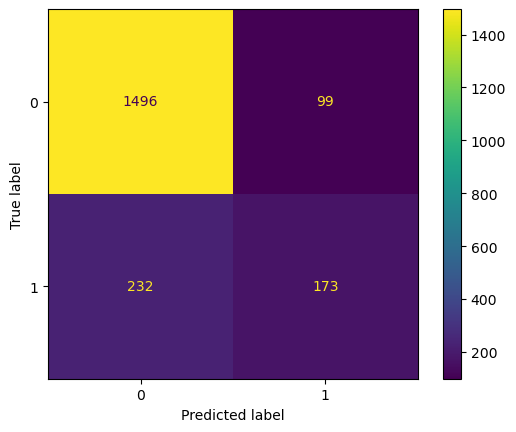

In [126]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

We Observe that from KNearest Neighbors ConfusionMatrix -
- 1496 customers are correctly classifed under "not churned" category & 99 are misclassified.
- 173 customers are correctly classifed under "churned" category & 232 are misclassified.

In [172]:
#Accuracy Score

from sklearn.metrics import accuracy_score
KNN_pred2=(accuracy_score(y_test,y_pred2)*100)
print(KNN_pred2)

83.45


In [109]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1595
           1       0.64      0.43      0.51       405

    accuracy                           0.83      2000
   macro avg       0.75      0.68      0.71      2000
weighted avg       0.82      0.83      0.82      2000



In [111]:
training_score = classifier.score(x_train,y_train)
training_score

0.87675

In [112]:
testing_score = classifier.score(x_train,y_train)
testing_score

0.87675

### 3] DecisionTreeClassifier
- Decision Trees (DTs) are a non-parametric supervised learning method used for classification & regression.
- The goal is to create the model that predict the value of a target variable by learning simple decision rules inferred from the data features.

In [113]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred3=dt.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [123]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred3)
print(result)

[[1366  229]
 [ 187  218]]


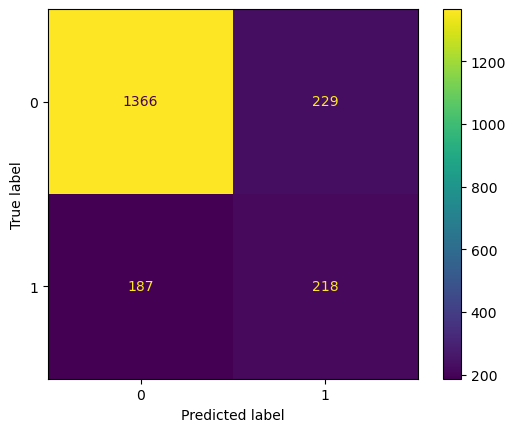

In [124]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

We Observe that from DecisionTree ConfusionMatrix -
- 1366 customers are correctly classifed under "not churned" category & 229 are misclassified.
- 218 customers are correctly classifed under "churned" category & 187 are misclassified.

In [185]:
#Accuracy Score

from sklearn.metrics import accuracy_score
DC_pred3=(accuracy_score(y_test,y_pred3)*100)
print(DC_pred3)

79.2


In [117]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1595
           1       0.49      0.54      0.51       405

    accuracy                           0.79      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.79      0.80      2000



In [118]:
training_score = dt.score(x_train,y_train)
training_score

1.0

In [119]:
testing_score = dt.score(x_train,y_train)
testing_score

1.0

### 4] RandomForest Classifier
- A Random Forest is a machine learning technique that is used to solve regression & classification problems.
- It utilizes ensemble learning, which is a technique that combines many classifiers to provide solution to complex problems.
- Easy to use machine learning algorithm that produce, even without hyper-paramenter tuning.
- A great result most of the time.

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred4=rf.predict(x_test)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred4)
print(result)

[[1522   73]
 [ 198  207]]


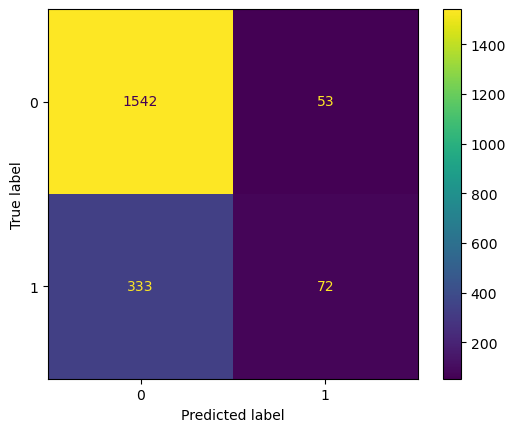

In [129]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

We Observe that from DecisionTree ConfusionMatrix -
- 1542 customers are correctly classifed under "not churned" category & 53 are misclassified.
- 72 customers are correctly classifed under "churned" category & 333 are misclassified.

In [191]:
# Accuracy Score

from sklearn.metrics import accuracy_score
RF_pred4=(accuracy_score(y_test,y_pred4)*100)
print(RF_pred4)

86.45


In [131]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.74      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



In [132]:
training_score = rf.score(x_train,y_train)
training_score

1.0

In [133]:
testing_score = rf.score(x_train,y_train)
testing_score

1.0

### 5] Support Vector Machine
- The machine learning models learn from the past input data & predict the output.
- Support vector machines are basically supervised learning models used for classification & regression analysis.

In [134]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
y_pred5=sv.predict(x_test)
y_pred5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred5)
print(result)

[[1560   35]
 [ 239  166]]


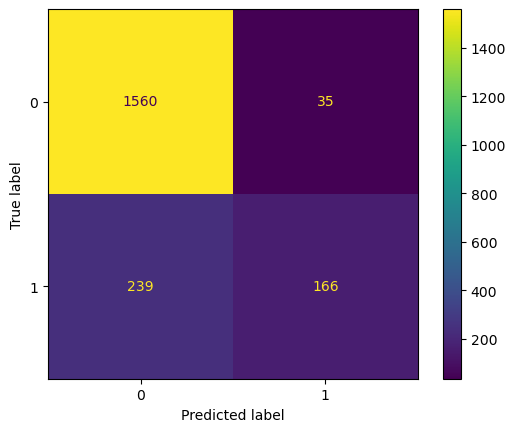

In [138]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

We Observe that from Support Vector Machine ConfusionMatrix -
- 1560 customers are correctly classifed under "not churned" category & 35 are misclassified.
- 166 customers are correctly classifed under "churned" category & 239 are misclassified.

In [180]:
#Accuracy Score

from sklearn.metrics import accuracy_score
SVM_pred5=(accuracy_score(y_test,y_pred5)*100)
print(SVM_pred5)

86.3


In [140]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1595
           1       0.83      0.41      0.55       405

    accuracy                           0.86      2000
   macro avg       0.85      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



In [142]:
training_score = sv.score(x_train,y_train)
training_score

0.862

In [143]:
testing_score = sv.score(x_train,y_train)
testing_score

0.862

### 6] Naive Bayes
- Naive Bayes is a probabilistic classification algorithm based on Bayes theorem.
- It assume that the features are independent of each other.
- The calculation computationally efficient.

In [145]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(x_train,y_train)
y_pred6=GNB.predict(x_test)
y_pred6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
reult=confusion_matrix(y_test,y_pred6)
print(result)

[[1560   35]
 [ 239  166]]


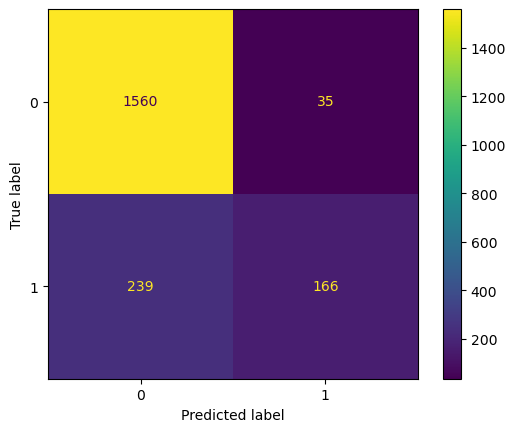

In [148]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

We Observe that from Naive Bayes ConfusionMatrix -
- 1560 customers are correctly classifed under "not churned" category & 35 are misclassified.
- 166 customers are correctly classifed under "churned" category & 239 are misclassified.

In [181]:
#Accuracy Score

from sklearn.metrics import accuracy_score
NB_pred6=(accuracy_score(y_test,y_pred6)*100)
print(NB_pred6)

82.75


In [150]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1595
           1       0.69      0.26      0.38       405

    accuracy                           0.83      2000
   macro avg       0.77      0.62      0.64      2000
weighted avg       0.81      0.83      0.80      2000



In [151]:
training_score = GNB.score(x_train,y_train)
training_score

0.82825

In [152]:
testing_score = GNB.score(x_train,y_train)
testing_score

0.82825

### 7] AdaBoostClassifier
- An AdaBoost Classifier is a meta-estimator that begins by fitting a classifier on the original dataset & then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [154]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred7=ad.predict(x_test)
y_pred7

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [155]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred7)
print(result)

[[1506   89]
 [ 188  217]]


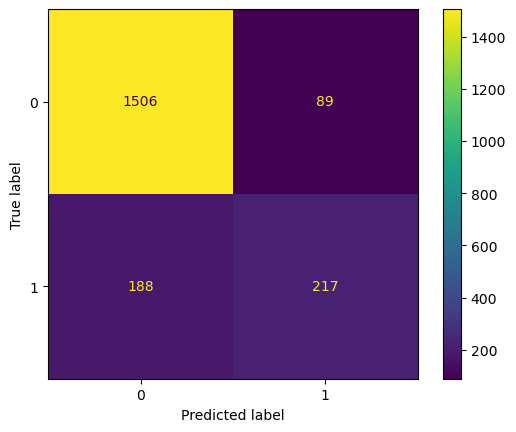

In [156]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

We Observe that from AdaBoost ConfusionMatrix -
- 1506 customers are correctly classifed under "not churned" category & 89 are misclassified.
- 217 customers are correctly classifed under "churned" category & 188 are misclassified.

In [182]:
#Accuracy Score

from sklearn.metrics import accuracy_score
AB_pred7=(accuracy_score(y_test,y_pred7)*100)
print(AB_pred7)

86.15


In [158]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1595
           1       0.71      0.54      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [159]:
training_score = ad.score(x_train,y_train)
training_score

0.856375

In [160]:
testing_score = ad.score(x_train,y_train)
testing_score

0.856375

### 8] XgBoost
- XgBoost is a gradient boosting algorithm for supervised learning.
- It's a highly efficient & scalable implementation of the boosting algorithm, with performance comparable to that of other state-of-the-art machine learning algorithms in most cases.

In [161]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred8=xg.predict(x_test)
y_pred8

array([0, 0, 0, ..., 0, 0, 0])

In [162]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred8)
print(result)

[[1498   97]
 [ 200  205]]


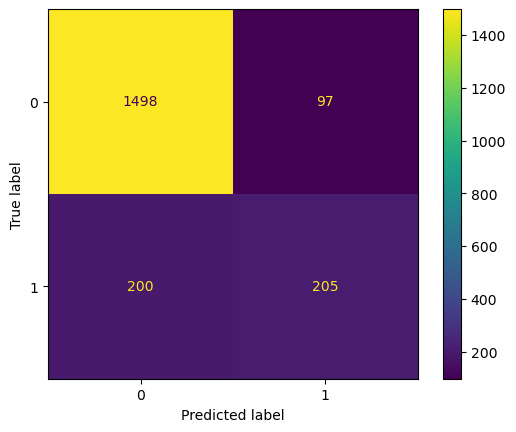

In [163]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

We Observe that from XgBoost ConfusionMatrix -
- 1498 customers are correctly classifed under "not churned" category & 97 are misclassified.
- 205 customers are correctly classifed under "churned" category & 200 are misclassified.

In [183]:
#Accuracy score

from sklearn.metrics import accuracy_score
XgB_pred8=(accuracy_score(y_test,y_pred8)*100)
print(XgB_pred8)

85.15


In [165]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.68      0.51      0.58       405

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [166]:
training_score = xg.score(x_train,y_train)
training_score

0.950375

In [167]:
testing_score = xg.score(x_train,y_train)
testing_score

0.950375

In [184]:
dic={'model':['LR','KNN','DC','RF','SVM','NB','AB','XgB'],'accuracy score':[LR_pred1,KNN_pred2,DC_pred3,RF_pred4,SVM_pred5,NB_pred6,AB_pred7,XgB_pred8]}
result=pd.DataFrame(dic)
result

,model,accuracy score
0,LR,80.70
1,KNN,83.45
2,DC,79.20
3,RF,86.45
4,SVM,86.30
5,NB,82.75
6,AB,86.15
7,XgB,85.15


<Axes: >

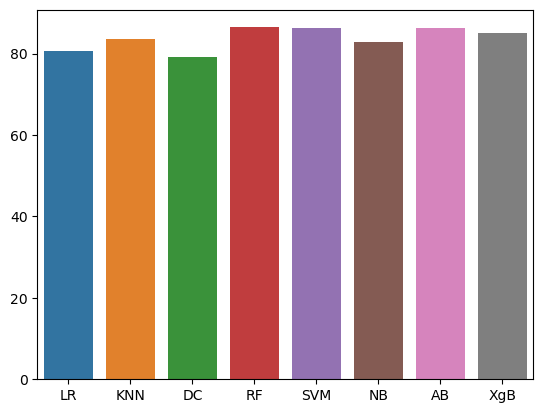

In [190]:
sns.barplot(x='model',y='accuracy score',data=dic)

### Conclusion  -

- From the perfomance evaluation Random Forest Classifier have highest accuracy.
- Also using other perfomance evaluation precision value is high for RV.
- RF is the best model for our dataset 